['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


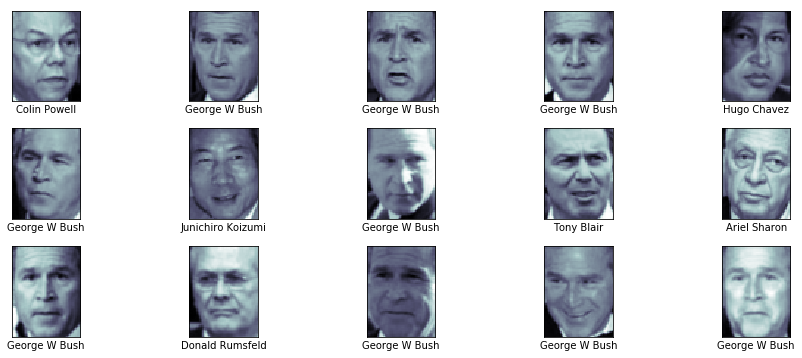

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# IMPORTANDO EL DATASET "LABELED FACES IN THE WILD"
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

# MOSTRANDO ALGUNAS DE LAS IMAGENES
fig, ax = plt.subplots(3, 5, figsize=(14, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
    fig.subplots_adjust(wspace=1.5, hspace=0.3)

In [2]:
# EXTRAYENDO LOS COMPONENTES PRINCIPALES DE LAS IMÁGENES
from sklearn.svm import SVC
from sklearn.decomposition import PCA #RandomizedPCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42, 
          svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
model

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [3]:
# GENERANDO CONJUNTOS DE ENTRENAMIENTO Y PRUEBA
from sklearn.model_selection import train_test_split #cross_validation
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data,
                                                faces.target, random_state=42)
print("Xtrain:"+str(len(Xtrain))+" Xtest:"+str(len(Xtest))+
      " ytrain:"+str(len(ytrain))+" ytest:"+str(len(ytest)))

Xtrain:1011 Xtest:337 ytrain:1011 ytest:337


In [4]:
# ENTRENANDO MSVs CON GRID SEARCH Y VALIDACIÓN CRUZADA
from sklearn.model_selection import GridSearchCV #Grid_search 
param_grid = {'svc__C': [1, 5, 10, 50], 
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 49.7 s
{'svc__C': 10, 'svc__gamma': 0.001}


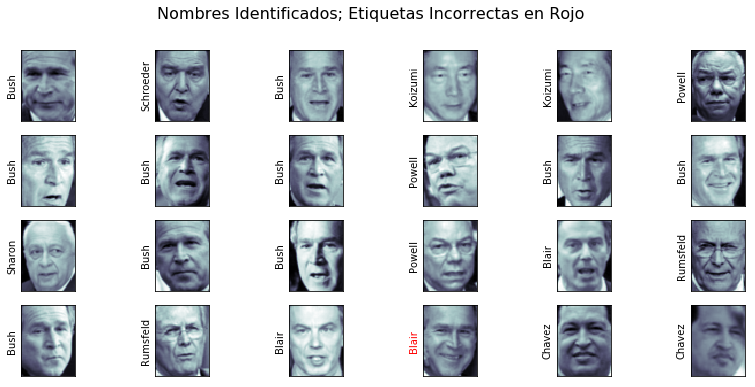

In [7]:
# PROBANDO LA MSV ENTRENADA CON LOS MEJORES PARÁMETROS
model = grid.best_estimator_
yfit = model.predict(Xtest)

# VERIFICANDO PARTE DE LA PREDICCIÓN
fig, ax = plt.subplots(4, 6, figsize=(14, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
        color='black' if yfit[i] == ytest[i] else 'red')
    fig.suptitle('Nombres Identificados; Etiquetas Incorrectas en Rojo',
                 size=16)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

C:\Users\DEPI-LaptopLanix\Anaconda3\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
C:\Users\DEPI-LaptopLanix\Anaconda3\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


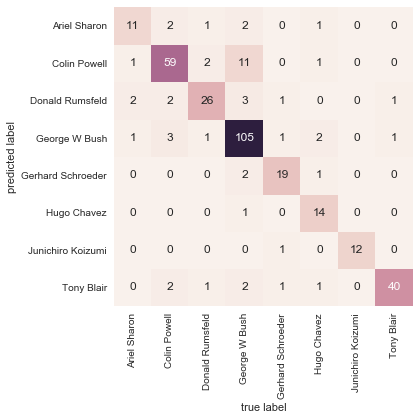

In [10]:
import seaborn as sns   #Seaborn = Statistical data visualization
sns.set()               #Asigna los valores default de Seaborn plotting
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=faces.target_names,
    yticklabels=faces.target_names           
           )
plt.xlabel('true label')
plt.ylabel('predicted label');